In [17]:
import os
import scipy
import utils

import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
datadir = '../datasets/NNN/'
fnames = utils.fnames(datadir)
# utils.compute_noise_ceiling(data) # data should be (units, conditions, reps)
dat = pd.read_pickle(os.path.join(datadir, 'fr_data.pkl'))

In [45]:
roi = 'MF1_9_F' #'MF1_9_F'
roi_data = dat[(dat['roi']==roi)]

period = 'pre'

# the array is still ragged
all_pre = list(roi_data[period])
num_units = len(all_pre)
num_images = len(all_pre[0])

# maximum number of reps for a single image
max_reps = max(
    len(arr) if hasattr(arr, "__len__") else 0
    for pre in all_pre
    for arr in pre)

# pad with nan
stacked = np.full((num_units, num_images, max_reps), np.nan, dtype=float)
for unit_i, pre in enumerate(all_pre):
    for img in range(num_images):
        arr = np.array(pre[img])
        reps_here = len(arr)
        if reps_here > 0:
            stacked[unit_i, img, :reps_here] = arr
            
print(stacked.shape) # (units, conditions, trials)

(474, 1072, 9)


In [46]:
(noiseceiling, ncsnr, signalvar, noisevar) = utils.compute_noise_ceiling(stacked)

/Users/aim/Desktop/HVRD/workspace/dynamics/Triple-N/utils.py:137: RuntimeWarning: Mean of empty slice
  noisevar = np.nanmean(np.std(data_in, axis=2, ddof=1) ** 2, axis=1)
/Users/aim/Desktop/HVRD/workspace/dynamics/Triple-N/utils.py:146: RuntimeWarning: divide by zero encountered in divide
  ncsnr = np.sqrt(signalvar) / np.sqrt(noisevar)
/Users/aim/Desktop/HVRD/workspace/dynamics/Triple-N/utils.py:149: RuntimeWarning: invalid value encountered in divide
  noiseceiling = 100 * (ncsnr ** 2 / (ncsnr ** 2 + 1 / data_in.shape[2]))


Text(0.5, 1.0, 'ncsnr')

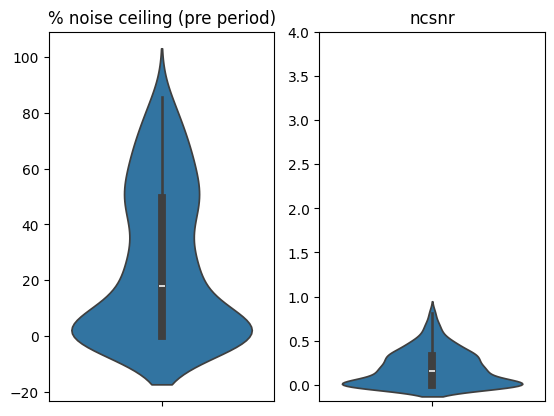

In [47]:
fig,axes = plt.subplots(1,2)

ax = axes[0]
sns.violinplot(noiseceiling, ax=ax)
ax.set_title(f'% noise ceiling ({period} period)')

ax = axes[1]
sns.violinplot(ncsnr, ax=ax)
ax.set_ylim(top=4)
ax.set_title('ncsnr')